In [ ]:
!pip install pydub
!pip install noisereduce

In [ ]:
import pydub
import noisereduce

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from pydub import AudioSegment
from noisereduce import reduce_noise
import pandas as pd
training_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/term project/patient_info.csv')
y = training_df['name']
for i in range(100,101):
  source_file='/content/drive/MyDrive/Colab Notebooks/term project/CTT wav file/'+str(i)+'CTT.wav'
  output_file='/content/drive/MyDrive/Colab Notebooks/term project/~noise CTT/'+str(i)+'CTT.wav'
  audio=AudioSegment.from_wav(source_file)
  audio_array=audio.get_array_of_samples()
  reduced_noise=reduce_noise(audio_array,audio.frame_rate)
  reduced_audio=AudioSegment(reduced_noise.tobytes(),frame_rate=audio.frame_rate,sample_width=audio.sample_width,channels=audio.channels)
  reduced_audio.export(output_file,format="wav")

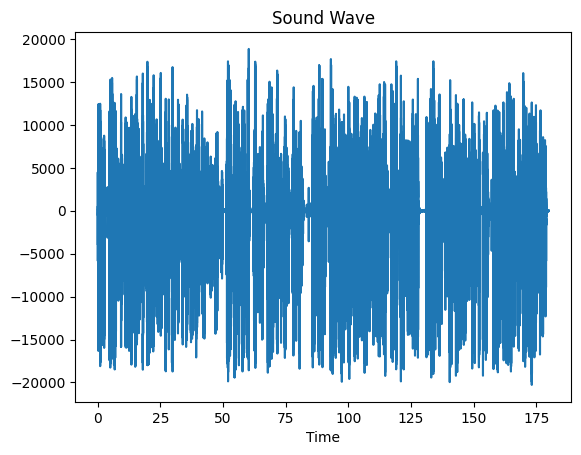

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')  # 使用 Colab 要換路徑使用

import matplotlib.pyplot as plt
import numpy as np
import wave

fig, ax = plt.subplots()  # 建立單一圖表

# 建立繪製聲波的函式
def visualize(path):
    raw = wave.open(path)          # 開啟聲音
    signal = raw.readframes(-1)    # 讀取全部聲音採樣
    signal = np.frombuffer(signal, dtype ="int16")  # 將聲音採樣轉換成 int16 的格式所組成的 np 陣列
    f_rate = raw.getframerate()    # 取得 framerate
    time = np.linspace(0, len(signal)/f_rate, num = len(signal))  # 根據聲音採樣產生成對應的時間

    ax.plot(time, signal)          # 畫線，橫軸時間，縱軸陣列值
    plt.title("Sound Wave")        # 圖表標題
    plt.xlabel("Time")             # 橫軸標題
    plt.show()
visualize('/content/drive/MyDrive/Colab Notebooks/term project/TED talk.wav/AaronHuey_2010X.wav')        # 讀取聲音

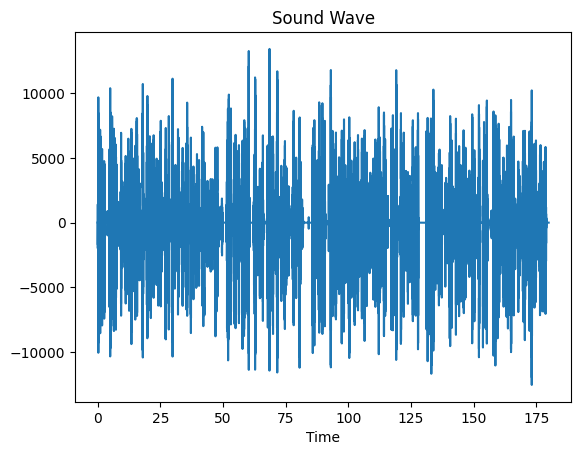

In [ ]:
fig, ax = plt.subplots()
visualize('/content/drive/MyDrive/Colab Notebooks/term project/TED talk.wav/unnoise_AaronHuey_2010X.wav')

In [ ]:
!pip install librosa

In [ ]:
!pip install pysndfx
!pip install python_speech_features
!pip install sox
!pip install git+https://github.com/rabitt/pysox.git
!apt -qq install -y sox

  Cloning https://github.com/rabitt/pysox.git to /tmp/pip-req-build-d4qflovs
  Running command git clone --filter=blob:none --quiet https://github.com/rabitt/pysox.git /tmp/pip-req-build-d4qflovs
  Resolved https://github.com/rabitt/pysox.git to commit 0a428b88f76c41e93eecbf49bb27b97c7b3f9de7
  Preparing metadata (setup.py) ... done
The following additional packages will be installed:
  libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-base libsox3 libwavpack1
Suggested packages:
  libsox-fmt-all
The following NEW packages will be installed:
  libopencore-amrnb0 libopencore-amrwb0 libsox-fmt-alsa libsox-fmt-base libsox3 libwavpack1 sox
0 upgraded, 7 newly installed, 0 to remove and 10 not upgraded.
Need to get 617 kB of archives.
After this operation, 1,764 kB of additional disk space will be used.
Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../0-libopencor

In [ ]:
from pysndfx import AudioEffectsChain
import numpy as np
import math
import python_speech_features
import scipy as sp
from scipy import signal
import sox

<Figure size 640x480 with 0 Axes>

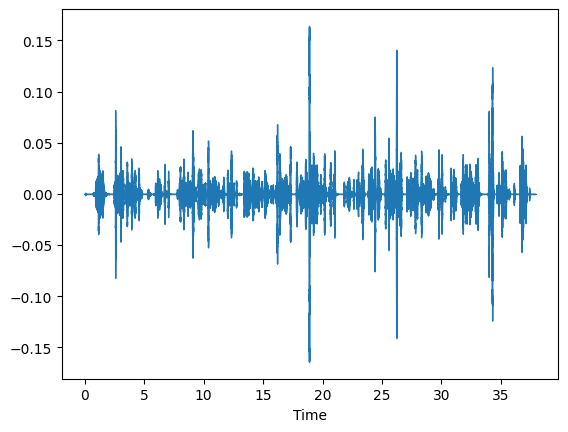

In [ ]:
import librosa.display
import numpy as np
y,sr=librosa.load("/content/drive/MyDrive/Colab Notebooks/term project/~noise CTT/1CTT.wav",sr=None)
plt.figure()
plt.show()
librosa.display.waveshow(y)

<Figure size 640x480 with 0 Axes>

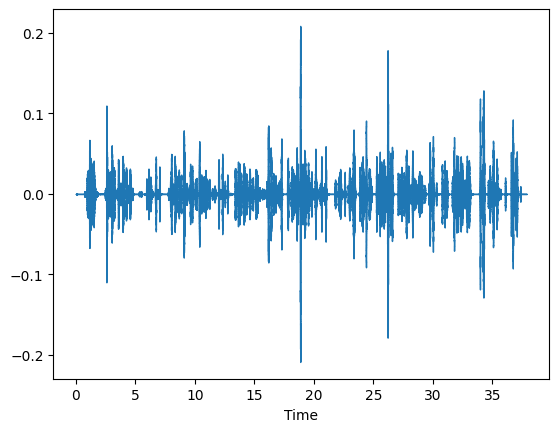

In [ ]:
y,sr=librosa.load("/content/drive/MyDrive/Colab Notebooks/term project/~noise CTT/1CTT.wav",sr=None)
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
threshold_h = np.max(cent)
threshold_l = 0.1
less_noise = AudioEffectsChain().lowshelf(gain=-12.0, frequency=threshold_l, slope=0.5).highshelf(gain=-12.0, frequency=threshold_h, slope=0.5).limiter(gain=6.0)
y_cleaned = less_noise(y)
plt.figure()
plt.show()
librosa.display.waveshow(y_cleaned)

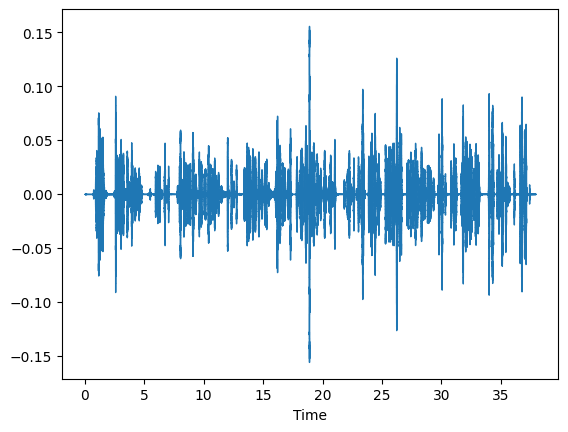

In [ ]:
y,sr=librosa.load("/content/drive/MyDrive/Colab Notebooks/term project/~noise CTT/1CTT.wav",sr=None)
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
threshold_h = np.max(cent)
threshold_l = 0.1
less_noise = AudioEffectsChain().lowshelf(gain=-30.0, frequency=threshold_l, slope=0.5).highshelf(gain=-30.0, frequency=threshold_h, slope=0.5).limiter(gain=10.0)
# less_noise = AudioEffectsChain().lowpass(frequency=threshold_h).highpass(frequency=threshold_l)
y_cleaned = less_noise(y)
cent_cleaned = librosa.feature.spectral_centroid(y=y_cleaned, sr=sr)
columns, rows = cent_cleaned.shape
boost_h = math.floor(rows/3*2)
boost_l = math.floor(rows/6)
boost = math.floor(rows/3)
# boost_bass = AudioEffectsChain().lowshelf(gain=20.0, frequency=boost, slope=0.8)
boost_bass = AudioEffectsChain().lowshelf(gain=16.0, frequency=boost_h, slope=0.5)#.lowshelf(gain=-20.0, frequency=boost_l, slope=0.8)
y_clean_boosted = boost_bass(y_cleaned)
librosa.display.waveshow(y_cleaned)